In [2]:
#Dependencies 
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Import Clean Data
data_file = os.path.join("Revised National Names Male.csv")
national_names_male_df = pd.read_csv(data_file)
data_file = os.path.join("Revised National Names Female.csv")
national_names_female_df = pd.read_csv(data_file)
national_names_male_df.head()

,Unnamed: 0,Id,Name,Year,Gender,Count,Rank,First Year,Total Count
0,0,943,John,1880,M,9655,1,1880,5084943
1,1,944,William,1880,M,9532,2,1880,4055473
2,2,945,James,1880,M,5927,3,1880,5105919
3,3,946,Charles,1880,M,5348,4,1880,2364332
4,4,947,George,1880,M,5126,5,1880,1454503


In [4]:
#Drop unneeded column
national_names_male_df.drop('Unnamed: 0', axis=1, inplace=True)
national_names_female_df.drop('Unnamed: 0', axis=1, inplace=True)
national_names_male_df.head()

,Id,Name,Year,Gender,Count,Rank,First Year,Total Count
0,943,John,1880,M,9655,1,1880,5084943
1,944,William,1880,M,9532,2,1880,4055473
2,945,James,1880,M,5927,3,1880,5105919
3,946,Charles,1880,M,5348,4,1880,2364332
4,947,George,1880,M,5126,5,1880,1454503


In [5]:
#Merge Dataframes
df_merge = pd.merge(national_names_female_df, national_names_male_df, how='outer', left_on=['Name','Year'], right_on=['Name','Year'])
df_merge_needed = df_merge[['Name','Year', 'Count_x', 'Count_y']]
df_merge_needed.columns = ['Name','Year', 'Female Count', 'Male Count']

In [6]:
#Find Names that are gender neutral 
total_names = df_merge_needed.groupby("Name").sum().sort_values('Female Count', ascending=False)
total_names['Total Counts']= total_names['Female Count']+total_names['Male Count']
total_names['Percentage Male']= total_names['Male Count']/total_names['Total Counts']*100
total_names = total_names.sort_values('Percentage Male', ascending=False)

In [7]:
#Only show names that are most gender neutral
middle = total_names[(total_names['Percentage Male']<=55) & (total_names['Percentage Male']>=45)]
middle.sort_values('Total Counts', ascending = False).head(10)

,Year,Female Count,Male Count,Total Counts,Percentage Male
Name,,,,,
Riley,262845,81605.0,87494.0,169099.0,51.741288
Jackie,226954,90337.0,78148.0,168485.0,46.382764
Kerry,186865,48452.0,49417.0,97869.0,50.493006
Robbie,255313,22215.0,20676.0,42891.0,48.205917
Justice,196143,13778.0,15423.0,29201.0,52.816684
Kris,152151,13437.0,13792.0,27229.0,50.651879
Blair,249607,12502.0,14242.0,26744.0,53.253066
Elisha,262845,13214.0,12431.0,25645.0,48.473387
Amari,69879,11469.0,12562.0,24031.0,52.274146


In [8]:
sorted_male_df = national_names_male_df.sort_values(['Name', 'Year'])

sorted_male_df["1 Year Change"] = abs(sorted_male_df["Count"].diff(-1))
sorted_male_df.sort_values('1 Year Change',ascending = False).head(10)

,Id,Name,Year,Gender,Count,Rank,First Year,Total Count,1 Year Change
729773,1811457,Noah,2014,M,19144,1,1880,317800,19138.0
729774,1811458,Liam,2014,M,18342,2,1947,137181,18337.0
729775,1811459,Mason,2014,M,17092,3,1880,225303,17086.0
729776,1811460,Jacob,2014,M,16712,4,1880,875334,16705.0
729777,1811461,William,2014,M,16687,5,1880,4055473,16682.0
729778,1811462,Ethan,2014,M,15619,6,1882,371668,15611.0
729779,1811463,Michael,2014,M,15323,7,1880,4309198,15317.0
729780,1811464,Alexander,2014,M,15293,8,1880,620385,15288.0
729781,1811465,James,2014,M,14301,9,1880,5105919,14296.0
184583,417569,Robert,1945,M,69926,2,1880,4796695,14204.0


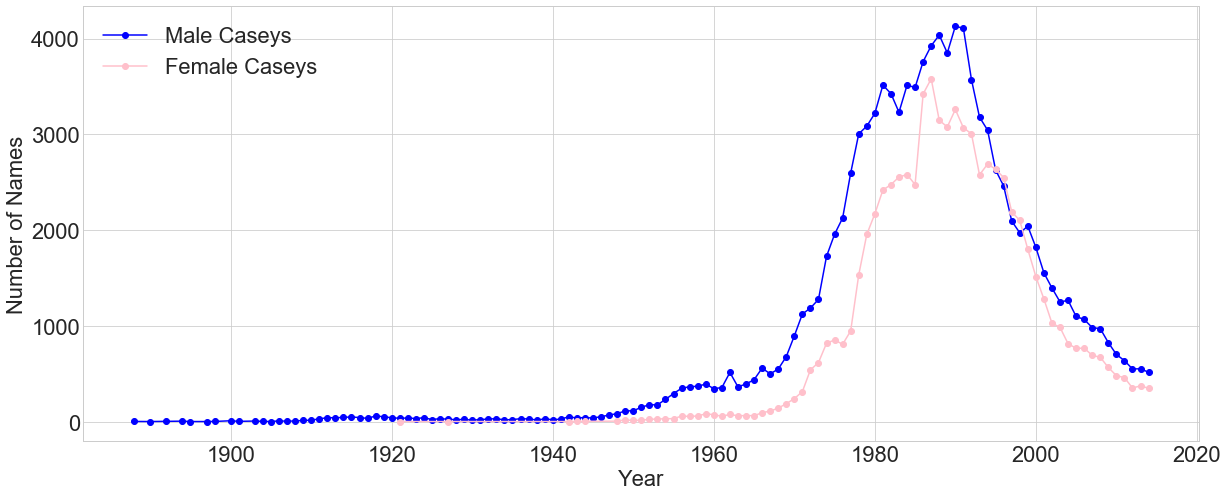

In [17]:
casey_male = national_names_male_df[national_names_male_df['Name']=='Casey'].sort_values('Year')
casey_female = national_names_female_df[national_names_female_df['Name']=='Casey'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(casey_male["Year"], casey_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(casey_female["Year"], casey_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Male Caseys", "Female Caseys"])
    #plt.xlim(1880, 1960)
    #plt.ylim(0, 1000)
    plt.show()

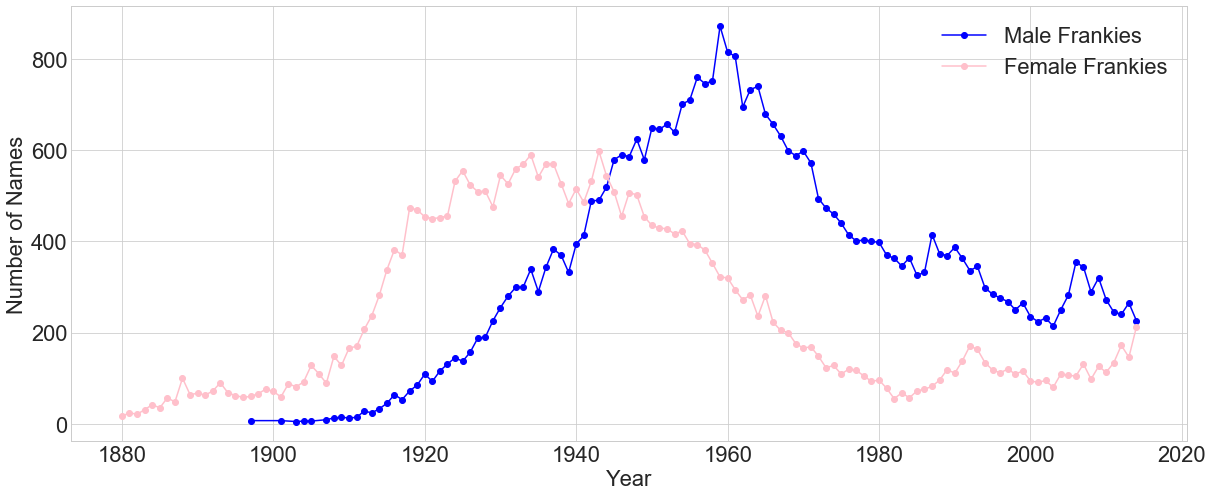

In [25]:
frankie_male = national_names_male_df[national_names_male_df['Name']=='Frankie'].sort_values('Year')
frankie_female = national_names_female_df[national_names_female_df['Name']=='Frankie'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(frankie_male["Year"], frankie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(frankie_female["Year"], frankie_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Male Frankies", "Female Frankies"])
    #plt.xlim(1880, 1960)
    #plt.ylim(0, 1000)
    plt.show()

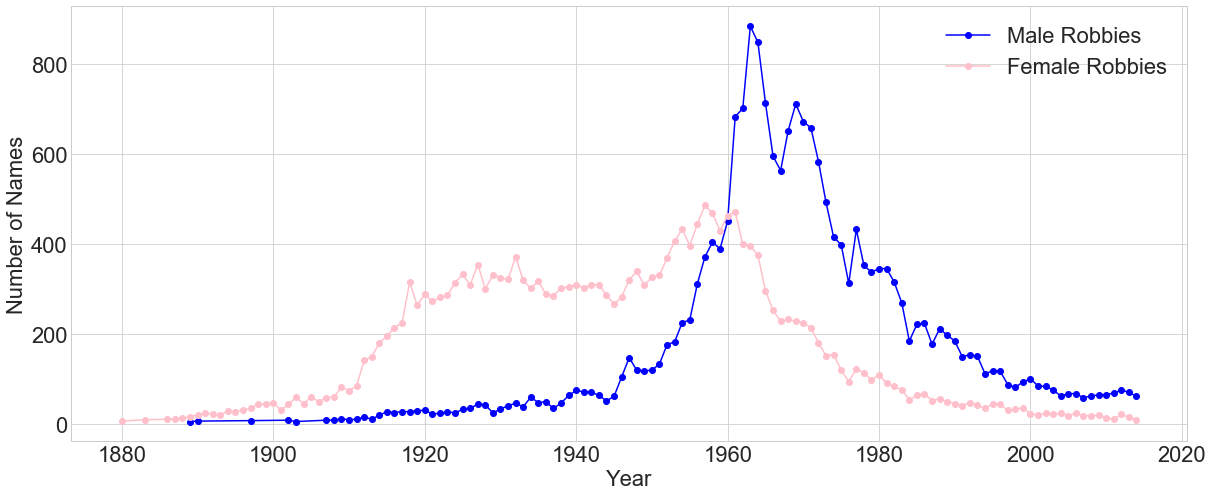

In [20]:
robbie_male = national_names_male_df[national_names_male_df['Name']=='Robbie'].sort_values('Year')
robbie_female = national_names_female_df[national_names_female_df['Name']=='Robbie'].sort_values('Year')
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,8))

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(robbie_male["Year"], robbie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(robbie_female["Year"], robbie_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Male Robbies", "Female Robbies"])
    #plt.xlim(1880, 1960)
    #plt.ylim(0, 1000)
    plt.show()

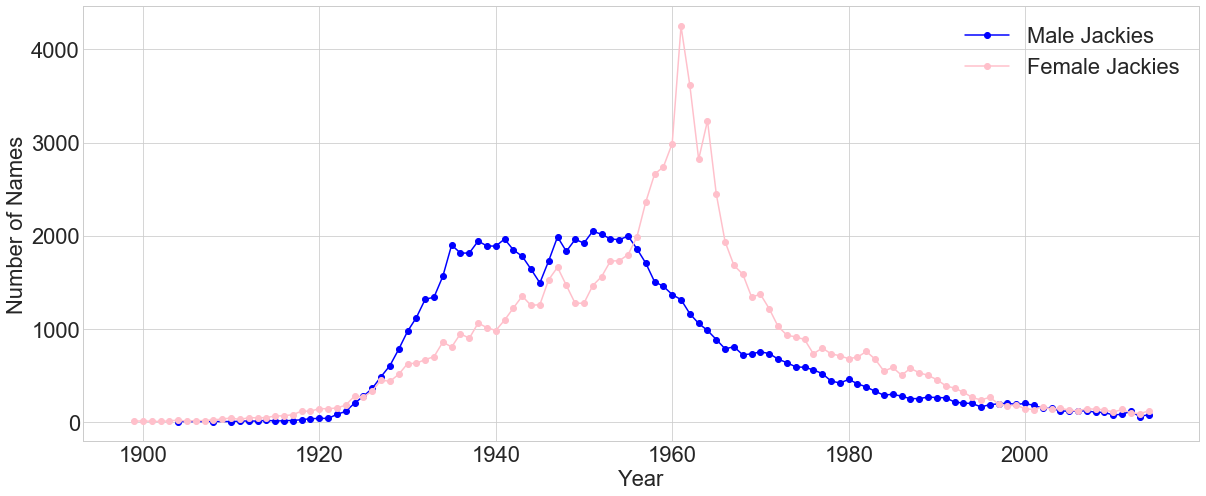

In [21]:
jackie_male = national_names_male_df[national_names_male_df['Name']=='Jackie'].sort_values('Year')
jackie_female = national_names_female_df[national_names_female_df['Name']=='Jackie'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jackie_male["Year"], jackie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jackie_female["Year"], jackie_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Male Jackies", "Female Jackies"])
    plt.show()

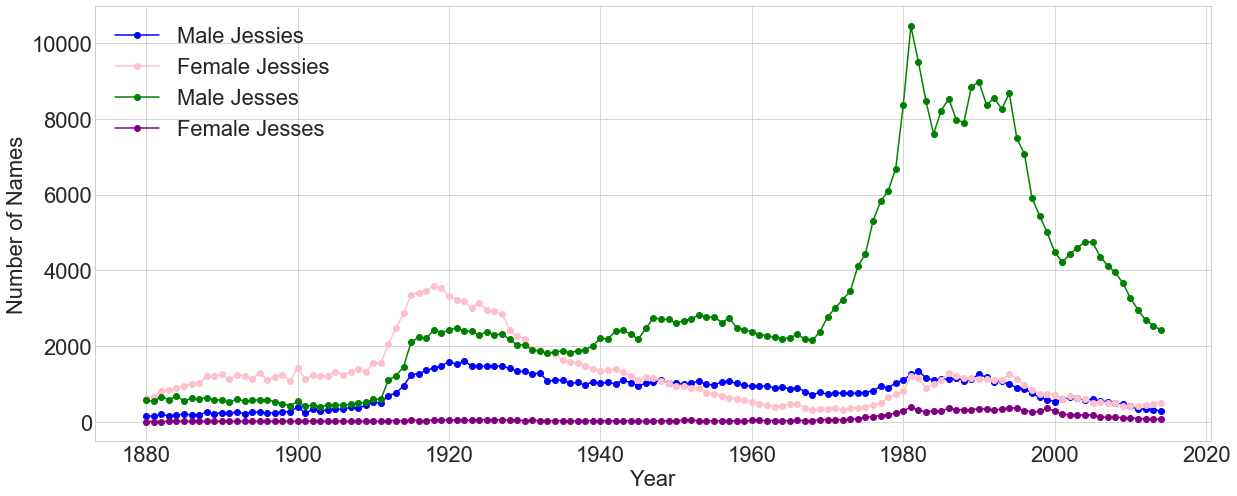

In [24]:
jesse_male = national_names_male_df[national_names_male_df['Name']=='Jesse'].sort_values('Year')
jesse_female = national_names_female_df[national_names_female_df['Name']=='Jesse'].sort_values('Year')
jessie_male = national_names_male_df[national_names_male_df['Name']=='Jessie'].sort_values('Year')
jessie_female = national_names_female_df[national_names_female_df['Name']=='Jessie'].sort_values('Year')
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jessie_male["Year"], jessie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jessie_female["Year"], jessie_female["Count"], marker = 'o', color = 'pink')  
    alt_male = plt.plot(jesse_male["Year"], jesse_male["Count"], marker = 'o', color = 'green')
    alt_female = plt.plot(jesse_female["Year"], jesse_female["Count"], marker = 'o', color = 'purple')

    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Male Jessies", "Female Jessies", "Male Jesses", "Female Jesses"])
    plt.show()